In [2]:
import warnings
warnings.filterwarnings('ignore')
import wradlib as wrl
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import PatchCollection
from matplotlib.colors import from_levels_and_colors
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib.cm as cm
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np
import datetime as dt
from osgeo import osr
import numpy as np
import glob

In [2]:
def get_radar_locations():

    radars = {}
    radar = {}
    radar['name'] = 'ASR Dresden'
    radar['wmo'] = 10487
    radar['lon'] = 13.76347
    radar['lat'] = 51.12404
    radar['alt'] = 261
    radars['ASD'] = radar
    
    radar = {}
    #### Kordinaten un hoehe checken! Neu
    # Hoehe üNN 2m
    # Turm 55 m
    #radar['name'] = 'Borkum'
    #radar['wmo'] = 10103
    #radar['lon'] = 6.748292
    #radar['lat'] = 53.564011
    #radar['alt'] = 57.
    #radars['ASB'] = radar
    
    #Fake Borkum/Emden
    radar['name'] = 'Emden'
    radar['wmo'] = 10103
    radar['lon'] = 7.02377
    radar['lat'] = 53.33872
    radar['alt'] = 58.
    radars['ASB'] = radar

    radar = {}
    radar['name'] = 'Boostedt'
    radar['wmo'] = 10132
    radar['lon'] = 10.04687
    radar['lat'] = 54.00438
    radar['alt'] = 124.56
    radars['BOO'] = radar

    radar = {}
    radar['name'] = 'Dresden'
    radar['wmo'] = 10488
    radar['lon'] = 13.76865
    radar['lat'] = 51.12465
    radar['alt'] = 263.36
    radars['DRS'] = radar

    radar = {}
    radar['name'] = 'Eisberg'
    radar['wmo'] = 10780
    radar['lon'] = 12.40278
    radar['lat'] = 49.54066
    radar['alt'] = 798.79
    radars['EIS'] = radar

    radar = {}
    radar['name'] = 'Emden'
    radar['wmo'] = 10204
    radar['lon'] = 7.02377
    radar['lat'] = 53.33872
    radar['alt'] = 58
    radars['EMD'] = radar

    radar = {}
    radar['name'] = 'Essen'
    radar['wmo'] = 10410
    radar['lon'] = 6.96712
    radar['lat'] = 51.40563
    radar['alt'] = 185.10
    radars['ESS'] = radar

    radar = {}
    radar['name'] = 'Feldberg'
    radar['wmo'] = 10908
    radar['lon'] = 8.00361
    radar['lat'] = 47.87361
    radar['alt'] = 1516.10
    radars['FBG'] = radar

    radar = {}
    radar['name'] = 'Flechtdorf'
    radar['wmo'] = 10440
    radar['lon'] = 8.802
    radar['lat'] = 51.3112
    radar['alt'] = 627.88
    radars['FLD'] = radar

    radar = {}
    radar['name'] = 'Hannover'
    radar['wmo'] = 10339
    radar['lon'] = 9.69452
    radar['lat'] = 52.46008
    radar['alt'] = 97.66
    radars['HNR'] = radar

    radar = {}
    radar['name'] = 'Neuhaus'
    radar['wmo'] = 10557
    radar['lon'] = 11.13504
    radar['lat'] = 50.50012
    radar['alt'] = 878.04
    radars['NEU'] = radar

    radar = {}
    radar['name'] = 'Neuheilenbach'
    radar['wmo'] = 10605
    radar['lon'] = 6.54853
    radar['lat'] = 50.10965
    radar['alt'] = 585.84
    radars['NHB'] = radar

    radar = {}
    radar['name'] = 'Offenthal'
    radar['wmo'] = 10629
    radar['lon'] = 8.71293
    radar['lat'] = 49.9847
    radar['alt'] = 245.80
    radars['OFT'] = radar

    radar = {}
    radar['name'] = 'Proetzel'
    radar['wmo'] = 10392
    radar['lon'] = 13.85821
    radar['lat'] = 52.64867
    radar['alt'] = 193.92
    radars['PRO'] = radar

    radar = {}
    radar['name'] = 'Memmingen'
    radar['wmo'] = 10950
    radar['lon'] = 10.21924
    radar['lat'] = 48.04214
    radar['alt'] = 724.40
    radars['MEM'] = radar

    radar = {}
    radar['name'] = 'Rostock'
    radar['wmo'] = 10169
    radar['lon'] = 12.05808
    radar['lat'] = 54.17566
    radar['alt'] = 37
    radars['ROS'] = radar

    radar = {}
    radar['name'] = 'Isen'
    radar['wmo'] = 10873
    radar['lon'] = 12.10177
    radar['lat'] = 48.1747
    radar['alt'] = 677.77
    radars['ISN'] = radar

    radar = {}
    radar['name'] = 'Tuerkheim'
    radar['wmo'] = 10832
    radar['lon'] = 9.78278
    radar['lat'] = 48.58528
    radar['alt'] = 767.62
    radars['TUR'] = radar

    radar = {}
    radar['name'] = 'Ummendorf'
    radar['wmo'] = 10356
    radar['lon'] = 11.17609
    radar['lat'] = 52.16009
    radar['alt'] = 183
    radars['UMM'] = radar

    
    return radars


In [3]:
#ZP = '201410070235'
ZP = '201803072145'
#ZP = '201409072140'

def read_all_dx(ZP):
    
    radar_range = 150

    YYYY, YY, MM, DD, hh, mm = ZP[0:4], ZP[2:4], ZP[4:6], ZP[6:8], ZP[8:10], ZP[10:12]
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/ags/velibor/data/radolan_dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    path = '/automount/ags/velibor/data/radolan_dx/test_for_height/*'

    #print (path)
    c_liste = sorted(glob.glob(path))
    #print c_liste
    #print (c_liste)
    nr_rad = len(c_liste)
    #print (nr_rad)
    # Daten Array mit Reflektivitaeten
    all_scans = np.empty((nr_rad,360,128))
    # Atribute
    metadata = [[None] ] * nr_rad

    # Alle Positionen
    all_lon = np.empty((nr_rad,360,radar_range))
    all_lat = np.empty((nr_rad,360,radar_range))
    all_alt = np.empty((nr_rad,360,radar_range))


    for jj in range(nr_rad):
        filename = wrl.util.get_wradlib_data_file(c_liste[jj])
        all_scans[jj], metadata[jj] = wrl.io.readDX(filename)


    radloc = get_radar_locations()
    #print radloc

    lon0 = np.empty(nr_rad)
    lat0 = np.empty(nr_rad)
    alt0 = np.empty(nr_rad)
    radname = []

    for rr in range(nr_rad):
        #print rr

        for ir in radloc.keys():
            #print ir

            if str(radloc[ir]['wmo'])==metadata[rr]['radarid']:
                print(str(radloc[ir]['wmo']),metadata[rr]['radarid'],radloc[ir]['lon'],radloc[ir]['lat'],radloc[ir]['name'])
                lon0[rr] = radloc[ir]['lon']
                lat0[rr] = radloc[ir]['lat']
                alt0[rr] = radloc[ir]['alt']
                radname.append(radloc[ir]['name'])
            else:

                pass

    print radname
    proj_stereo = wrl.georef.create_osr("dwd-radolan")
    proj_wgs = osr.SpatialReference()
    proj_wgs.ImportFromEPSG(4326)

    for rrr in range(nr_rad):

        radar_location = (lon0[rrr], lat0[rrr], alt0[rrr])
        
        azimuths = metadata[rrr]['azim']
        
        ranges = np.arange(0,radar_range)*1000 
        
        elevations = metadata[rrr]['elev']
        
        if (lon0[rrr]==6.748292) & (lat0[rrr]==53.564011) & (alt0[rrr]==57.):
            print ("Elevationen bei Borkum geändert!")
            elevations = (elevations / elevations) * 0.9
            
        print('--->>> Elevations: ', np.unique(elevations))
        #print 'elevation: ', elevations

        polargrid = np.meshgrid(ranges, azimuths)
        elevgrid = np.meshgrid(ranges, elevations)
        
        grid = wrl.georef.polar.spherical_to_proj(polargrid[0], polargrid[1],elevgrid[1], radar_location)
        #print '----->', polargrid[0].shape
        #print '----->', polargrid[1].shape

        lon, lat, alt = grid[:,:,0], grid[:,:,1], grid[:,:,2]

        lon, lat = wrl.georef.reproject(lon, lat, projection_target=proj_stereo ,projection_source=proj_wgs)
        
        all_lon[rrr,:,:] = lon
        all_lat[rrr,:,:] = lat
        all_alt[rrr,:,:] = alt
        print np.nanmax(alt)


    return all_lon, all_lat, all_alt, all_scans

In [4]:
#ZP = '201410070235'
ZP = '201803072145'
#ZP = '201409072140'

def read_all_dx(ZP):
    
    radar_range = 150

    YYYY, YY, MM, DD, hh, mm = ZP[0:4], ZP[2:4], ZP[4:6], ZP[6:8], ZP[8:10], ZP[10:12]
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    #path = '/automount/ags/velibor/data/radolan_dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    path = '/automount/ags/velibor/data/radolan_dx/test_for_height/*'

    #print (path)
    c_liste = sorted(glob.glob(path))
    #print c_liste
    #print (c_liste)
    nr_rad = len(c_liste)
    #print (nr_rad)
    # Daten Array mit Reflektivitaeten
    all_scans = np.empty((nr_rad,360,128))
    # Atribute
    metadata = [[None] ] * nr_rad

    # Alle Positionen
    all_lon = np.empty((nr_rad,360,radar_range))
    all_lat = np.empty((nr_rad,360,radar_range))
    all_alt = np.empty((nr_rad,360,radar_range))


    for jj in range(nr_rad):
        filename = wrl.util.get_wradlib_data_file(c_liste[jj])
        all_scans[jj], metadata[jj] = wrl.io.read_dx(filename)


    radloc = get_radar_locations()
    #print radloc

    lon0 = np.empty(nr_rad)
    lat0 = np.empty(nr_rad)
    alt0 = np.empty(nr_rad)
    radname = []

    for rr in range(nr_rad):
        #print rr

        for ir in radloc.keys():
            #print ir

            if str(radloc[ir]['wmo'])==metadata[rr]['radarid']:
                print(str(radloc[ir]['wmo']),metadata[rr]['radarid'],radloc[ir]['lon'],radloc[ir]['lat'],radloc[ir]['name'])
                lon0[rr] = radloc[ir]['lon']
                lat0[rr] = radloc[ir]['lat']
                alt0[rr] = radloc[ir]['alt']
                radname.append(radloc[ir]['name'])
            else:

                pass

    print radname
    proj_stereo = wrl.georef.create_osr("dwd-radolan")
    proj_wgs = osr.SpatialReference()
    proj_wgs.ImportFromEPSG(4326)

    for rrr in range(nr_rad):

        radar_location = (lon0[rrr], lat0[rrr], alt0[rrr])
        
        azimuths = metadata[rrr]['azim']
        
        ranges = np.arange(0,radar_range)*1000 
        
        elevations = metadata[rrr]['elev']
        
        if (lon0[rrr]==7.02377) & (lat0[rrr]==53.33872) & (alt0[rrr]==58.):
            print ("Elevationen bei Emden eingestellt!")
            # Hier werden einfach alle Elevation auf eins gesetzt und mit der 0.9 Elevation wie in Emden eingestellt
            elevations = (elevations / elevations) * 0.9
            
        print('--->>> Elevations: ', np.unique(elevations))
        #print 'elevation: ', elevations

        polargrid = np.meshgrid(ranges, azimuths)
        elevgrid = np.meshgrid(ranges, elevations)
        
        r = polargrid[0]

        theta = metadata[rrr]['elev']

        rrrc = r.T * np.cos(np.deg2rad(theta))
        rrrc = rrrc.T
        print (rrrc.shape, polargrid[1].shape, elevgrid[1].shape)
        #print np.unique(elevgrid[0])
        grid = wrl.georef.polar.spherical_to_proj(rrrc, polargrid[1],elevgrid[1], radar_location)
        #print '----->', polargrid[0].shape
        #print '----->', polargrid[1].shape

        lon, lat, alt = grid[:,:,0], grid[:,:,1], grid[:,:,2]

        lon, lat = wrl.georef.reproject(lon, lat, projection_target=proj_stereo ,projection_source=proj_wgs)
        
        all_lon[rrr,:,:] = lon
        all_lat[rrr,:,:] = lat
        all_alt[rrr,:,:] = alt
        print np.nanmax(alt)


    return all_lon, all_lat, all_alt, all_scans

In [5]:
#Einlesen aller DX Standorte
#all_lon, all_lat, all_alt, all_scans = read_all_dx(ZP)
all_lon, all_lat, all_alt, all_scans = read_all_dx(ZP)

('10103', '10103', 7.02377, 53.33872, 'Emden')
('10132', '10132', 10.04687, 54.00438, 'Boostedt')
('10169', '10169', 12.05808, 54.17566, 'Rostock')
('10339', '10339', 9.69452, 52.46008, 'Hannover')
('10356', '10356', 11.17609, 52.16009, 'Ummendorf')
('10392', '10392', 13.85821, 52.64867, 'Proetzel')
('10410', '10410', 6.96712, 51.40563, 'Essen')
('10440', '10440', 8.802, 51.3112, 'Flechtdorf')
('10488', '10488', 13.76865, 51.12465, 'Dresden')
('10557', '10557', 11.13504, 50.50012, 'Neuhaus')
('10605', '10605', 6.54853, 50.10965, 'Neuheilenbach')
('10629', '10629', 8.71293, 49.9847, 'Offenthal')
('10780', '10780', 12.40278, 49.54066, 'Eisberg')
('10832', '10832', 9.78278, 48.58528, 'Tuerkheim')
('10873', '10873', 12.10177, 48.1747, 'Isen')
('10908', '10908', 8.00361, 47.87361, 'Feldberg')
('10950', '10950', 10.21924, 48.04214, 'Memmingen')
['Emden', 'Boostedt', 'Rostock', 'Hannover', 'Ummendorf', 'Proetzel', 'Essen', 'Flechtdorf', 'Dresden', 'Neuhaus', 'Neuheilenbach', 'Offenthal', 'Eis

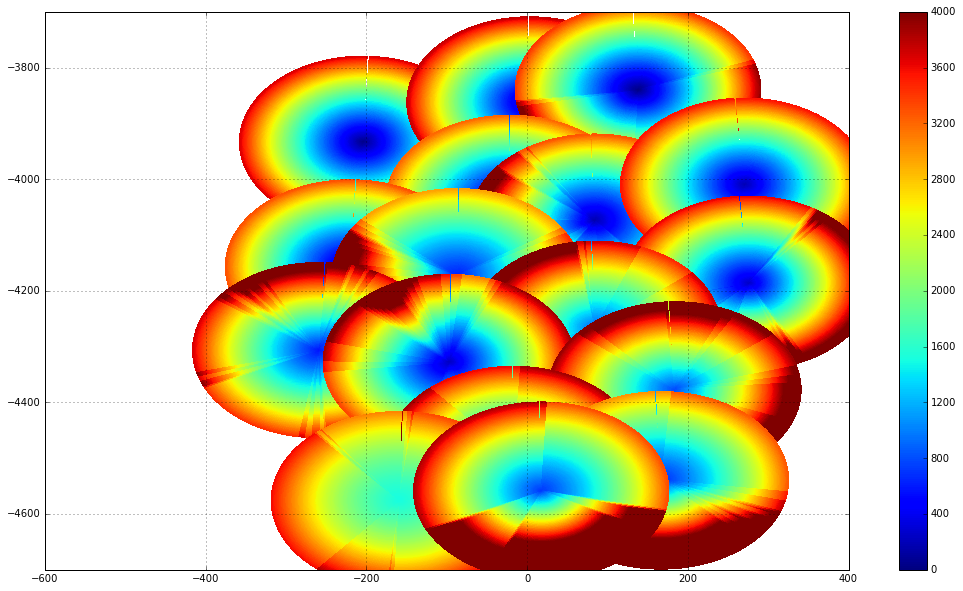

In [7]:
plt.figure(figsize=(18,10))

for plpl in range(all_lon.shape[0]):
    #print plpl
    plt.pcolormesh(all_lon[plpl,...], all_lat[plpl,...], all_alt[plpl,...], vmin=0, vmax=4000)

plt.xlim(-600,400)
plt.ylim(-4700, -3700)
plt.colorbar()
plt.grid()

In [8]:
# RADOLAN GRID LADEN
print(wrl.georef.get_radolan_grid().shape)
x = wrl.georef.get_radolan_grid(1100,900)[:,:,0]
y = wrl.georef.get_radolan_grid(1100,900)[:,:,1]
print (x.shape, y.shape)

(900, 900, 2)
((1100, 900), (1100, 900))


### Interpolate dx on RADOLAN gird
-------------------------------

In [9]:
def ipoli_radi(gr_grid, gr_data,sr_grid,radius):
    """

    Parameters
    ----------
    gr_grid ::: grid of the Ground Radar
    gr_data ::: data of the Ground Radar
    sr_grid ::: grid oft the Spaceborn Radar
    radius  ::: radius of the dpr foot prints


    Returns
    -------
    gs_grid ::: Interpolated Groundradar Data on Spaceborne Grid

    """

    gr_ipoli_data_min = np.zeros((sr_grid.shape[0]))
    gr_ipoli_data_max = np.zeros((sr_grid.shape[0]))
    gr_ipoli_data_mean = np.zeros((sr_grid.shape[0]))
    gr_ipoli_data_std = np.zeros((sr_grid.shape[0]))

    for i in range(sr_grid.shape[0]):

        x0, y0 = sr_grid[i,0], sr_grid[i,1]  ###########x y richtig?

        rr = np.sqrt((gr_grid[:,0] - x0)**2 + (gr_grid[:,1] - y0)**2)
        ## Todo: hier fehlt die Wichtung
        #print (gr_data[rr < radius])
        #gr_ipoli_data[i] = np.nanmean(gr_data[rr < radius])
        if gr_data[rr < radius].size!=0:

            gr_ipoli_data_max[i] = np.nanmax(gr_data[rr < radius])
            gr_ipoli_data_min[i] = np.nanmin(gr_data[rr < radius])
            gr_ipoli_data_mean[i] = np.nanmean(gr_data[rr < radius])
            gr_ipoli_data_std[i] = np.nanstd(gr_data[rr < radius])
        else:
            gr_ipoli_data_max[i] = np.nan
            gr_ipoli_data_min[i] = np.nan
            gr_ipoli_data_mean[i] = np.nan
            gr_ipoli_data_std[i] = np.nan
            # mein Pull Verfahren
            # pull_range = 1 #km
            # gr_ipoli_data[i] = np.nanmax(gr_data[rr < radius + pull_range])

    return gr_ipoli_data_max, gr_ipoli_data_min, gr_ipoli_data_mean, gr_ipoli_data_std

In [10]:
def ipoli_radi_dem(gr_grid, gr_data,sr_grid,radius):
    """

    Parameters
    ----------
    gr_grid ::: grid of the Ground Radar
    gr_data ::: data of the Ground Radar
    sr_grid ::: grid oft the Spaceborn Radar
    radius  ::: radius of the dpr foot prints


    Returns
    -------
    gs_grid ::: Interpolated Groundradar Data on Spaceborne Grid

    """

    gr_ipoli_data_min = np.zeros((sr_grid.shape[0]))
    gr_ipoli_data_max = np.zeros((sr_grid.shape[0]))

    for i in range(sr_grid.shape[0]):

        x0, y0 = sr_grid[i,0], sr_grid[i,1]  ###########x y richtig?

        rr = np.sqrt((gr_grid[:,0] - x0)**2 + (gr_grid[:,1] - y0)**2)
        ## Todo: hier fehlt die Wichtung
        #print (gr_data[rr < radius])
        #gr_ipoli_data[i] = np.nanmean(gr_data[rr < radius])
        if gr_data[rr < radius].size!=0:

            gr_ipoli_data_max[i] = np.nanmax(gr_data[rr < radius])
            gr_ipoli_data_min[i] = np.nanmin(gr_data[rr < radius])
        else:
            gr_ipoli_data_max[i] = np.nan
            gr_ipoli_data_min[i] = np.nan
            # mein Pull Verfahren
            # pull_range = 1 #km
            # gr_ipoli_data[i] = np.nanmax(gr_data[rr < radius + pull_range])

    return gr_ipoli_data_max, gr_ipoli_data_min

In [11]:
def ipoli_radi_fast(xy_cut, gpm_xy,rwdata_cut, dpr_footprint, k=25):
    """
    ...
    """
    # cKDTree radolan
    tree = cKDTree(xy_cut, balanced_tree=False)

    # cKDTree gpm dpr
    tree_gpm = cKDTree(gpm_xy, balanced_tree=True)

    dists, ix = tree.query(gpm_xy, k=k) # k maximal possible ry pixel in dpr footprint
    ix2 = tree.query_ball_point(gpm_xy, dpr_footprint)

    ry_pns_w = []

    for i in range(ix.shape[0]):
        #i is all points in one dpr footprint
        #distancen for all i
        index = np.isin(ix[i,:],ix2[i] )
        res1 = np.nanmean(rwdata_cut.ravel()[ix[i,:][index]])
    

        ry_pns_w.append(res1)


    return np.array(ry_pns_w)   

In [12]:
%%time

#dx
xy_dx = np.vstack((all_lon.ravel(), all_lat.ravel())).transpose()
#radolan
grid_xy = np.vstack((x.ravel(), y.ravel())).transpose()

h_on_radolan_max, h_on_radolan_min, h_on_radolan_mean, h_on_radolan_std   = ipoli_radi(xy_dx, all_alt.ravel(), grid_xy, 1.5)
h_on_radolan_max = h_on_radolan_max.reshape(x.shape)
h_on_radolan_min = h_on_radolan_min.reshape(x.shape)
h_on_radolan_mean = h_on_radolan_mean.reshape(x.shape)
h_on_radolan_std = h_on_radolan_std.reshape(x.shape)

CPU times: user 4h 33min 56s, sys: 8.56 s, total: 4h 34min 4s
Wall time: 4h 34min 22s


In [15]:
## Save
## ----

#radolan_tif_path = '/automount/db01/python/data/DEM/radolan/radolan_1100x900.tif'
#ds = wrl.io.open_raster(radolan_tif_path)
#ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
#cor_dem = wrl.georef.raster.read_gdal_coordinates(ds,mode='centers')
#val_dem = wrl.georef.raster.read_gdal_values(ds)

np.save("/automount/ags/velibor/data/radolan_dx/RADOLAN_H_xymax_1100x900.npy",[x,y, h_on_radolan_max])
np.save("/automount/ags/velibor/data/radolan_dx/RADOLAN_H_xymin_1100x900.npy",[x,y, h_on_radolan_min])
np.save("/automount/ags/velibor/data/radolan_dx/RADOLAN_H_xymean_1100x900.npy",[x,y, h_on_radolan_mean])
np.save("/automount/ags/velibor/data/radolan_dx/RADOLAN_H_xystd_1100x900.npy",[x,y, h_on_radolan_std])


In [ ]:
## Save
## ----

radolan_tif_path = '/automount/db01/python/data/DEM/radolan/radolan_900x900.tif'
ds = wrl.io.open_raster(radolan_tif_path)
ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
cor_dem = wrl.georef.raster.read_gdal_coordinates(ds,mode='centers')
val_dem = wrl.georef.raster.read_gdal_values(ds)

In [4]:
rstd = np.load("/automount/ags/velibor/data/radolan_dx/RADOLAN_H_xystd_900x900.npy")[2]

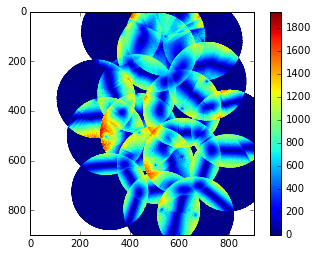

In [7]:
plt.imshow(rstd)
plt.colorbar()

In [ ]:
-np.ma.masked_invalid(val_dem[::-1, :])

In [ ]:
#h_on_radolan_max, h_on_radolan_min, h_on_radolan_mean, h_on_radolan_std
plt.imshow(h_on_radolan_std)
plt.colorbar()

In [ ]:
# Save
#np.save("/automount/ags/velibor/data/radolan_dx/RY_maxHxy_b2017.npy",[x,y, h_on_radolan_max])
#np.save("/automount/ags/velibor/data/radolan_dx/RY_minHxy_b2017.npy",[x,y, h_on_radolan_min])


In [ ]:
rhmax = np.load("/automount/ags/velibor/data/radolan_dx/RY_maxHxy_b2017.npy")
rhmin = np.load("/automount/ags/velibor/data/radolan_dx/RY_minHxy_b2017.npy")

In [ ]:
from pcc import plot_borders
from pcc import plot_radar
from pcc import plot_radar2
from pcc import plot_dem

In [ ]:
def plot_radar(radar, ax, proj):

    site = (radar['lon'], radar['lat'], radar['alt'] )
    
    r = np.arange(1, 151) * 1000

    # azimuth array 1 degree spacing
    az = np.linspace(0, 360, 361)[0:-1]

    # build polygons for maxrange rangering
    polygons = wrl.georef.spherical_to_polyvert(r, az, 0,
                                                site,
                                                proj=proj)
    polygons = polygons[..., 0:2]
    polygons.shape = (len(az), len(r), 5, 2)
    polygons = polygons[:, -1, :, :]

    x_loc, y_loc = wrl.georef.reproject(site[0], site[1],
                                        projection_source=proj_wgs,
                                        projection_target=proj)


    # create PolyCollections and add to respective axes
    polycoll = mpl.collections.PolyCollection(polygons, closed=True,
                                              edgecolors='k',
                                              facecolors='k')
    ax.add_collection(polycoll, autolim=True)

    # plot radar location and information text
    #ax.scatter(x_loc, y_loc, s=40, color='red', edgecolors='black')
    #ax.text(x_loc, y_loc, radar['name'], color='k')



In [ ]:
def plot_all_cband2(ax):
    for i in get_radar_locations().keys():

        if i =='EMD':
            pass
        else:
            plot_radar(get_radar_locations()[i], ax , proj_stereo)
            


In [ ]:
# create radolan projection object
proj_stereo = wrl.georef.create_osr("dwd-radolan")

# create wgs84 projection object
proj_wgs = osr.SpatialReference()
proj_wgs.ImportFromEPSG(4326)

### Read DEM Data for RADOLAN
-------------------------------

In [ ]:
rhmax = np.load("/automount/ags/velibor/data/radolan_dx/RY_maxHxy_b2017.npy")
rhmin = np.load("/automount/ags/velibor/data/radolan_dx/RY_minHxy_b2017.npy")

In [ ]:
radolan_tif_path = '/automount/db01/python/data/DEM/radolan/radolan_900x900.tif'
ds = wrl.io.open_raster(radolan_tif_path)
ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
cor_dem = wrl.georef.raster.read_gdal_coordinates(ds,mode='centers')
val_dem = wrl.georef.raster.read_gdal_values(ds)

In [ ]:
cor_dem = wrl.georef.raster.read_gdal_coordinates(ds,mode='centers')
val_dem = wrl.georef.raster.read_gdal_values(ds)
print(cor_dem.shape, val_dem.shape)
#cor_dem = cor_dem[:,0:900, :]
#val_dem = val_dem[:,0:900]

In [ ]:
val_dem0 = val_dem.copy()
val_dem[val_dem<0]=0

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(val_dem[::-1, ::-1],  cmap=cm.terrain,vmin=0, vmax=1500)
plt.colorbar(shrink=cc)
plt.subplot(1,3,2)
plt.imshow(np.ma.masked_invalid(h_on_radolan_min),  cmap=cm.jet,vmin=0, vmax=4000)
plt.colorbar(shrink=cc)
plt.subplot(1,3,3)
plt.imshow(h_on_radolan_min- np.ma.masked_invalid(val_dem[::-1, :]),  cmap=cm.jet,vmin=0, vmax=4000)
plt.colorbar(shrink=cc)

In [ ]:
val_dem.shape

In [ ]:
cc=0.5
def get_miub_cmap():
    import matplotlib.colors as col
    #startcolor = 'blue'  # a dark olive
    #color1 = 'blue'
    color3 = 'lightgreen'
    color4 = 'green'
    color5 = 'yellow'
    color6 = 'orange'
    color7 = 'brown'
    color8 = 'saddlebrown'
    #color6 = 'grey'
    endcolor = 'white'    # medium dark red
    colors = [ color3, color4, color5, color6, color7, color8, endcolor]
    return col.LinearSegmentedColormap.from_list('miub1',colors)


fig = plt.figure(figsize=(12,12))

ax4 = fig.add_subplot(111, aspect='equal')

cmap3 = get_miub_cmap()
# extract all colors from the .jet map
cmaplist3 = [cmap3(i) for i in range(cmap3.N)]
# force the first color entry to be grey
cmaplist3[0] = (.5,.5,.5,1.0)
# create the new map
cmap3 = cmap3.from_list('Custom cmap', cmaplist3, cmap3.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds3 = np.array([0,50,500,1200,1600,2400,2800,3400])
norm3 = mpl.colors.BoundaryNorm(bounds3, cmap3.N)


filename = wrl.util.get_wradlib_data_file('geo/radolan_900x900_cr_500.tif')
# pixel_spacing is in output units (lonlat)
ds = wrl.io.open_raster(filename)
# pixel_spacing is in output units (lonlat)
from matplotlib.colors import LogNorm
ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
rastervalues, rastercoords, proj = wrl.georef.extract_raster_dataset(ds)
# specify kwargs for plotting, using terrain colormap and LogNorm
dem = ax4.pcolormesh(rastercoords[..., 0], rastercoords[..., 1],
                    val_dem0+8,  cmap=cmap3,
                    vmin=0, vmax=1500)

#plot_all_cband2(ax4)
plot_borders(ax4)

cb = plt.colorbar(dem, shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
#plt.axis('off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)

plt.tight_layout()
# pad
# W-pad
# H_pad
#plt.subplots_adjust(hspace=0.1,wspace = 0.1 )
#plt.savefig("/automount/ftp/velibor/RY_H2_maxmindiff_RADOLANNETWORK.png")
plt.show()

In [ ]:
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds = np.arange(0,6000,400)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)



cc=0.6
######################################################################################################################


fig = plt.figure(figsize=(16,16))
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.8, wspace=0.2, hspace=0.2)

ax1 = fig.add_subplot(223, aspect='equal')
colmap = 'jet'
plt.pcolormesh(x,y,np.ma.masked_invalid(h_on_radolan_max)-np.ma.masked_invalid(val_dem[::-1, :]),
               vmin=0, vmax=6000, cmap=cmap, norm=norm)
#plt.title('c) Maximum beam height', fontsize=20)
plot_borders(ax1)
plot_all_cband2(ax1)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)
plt.grid()
#plt.axis('off')

plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)

######################################################################################################################
ax2 = fig.add_subplot(222, aspect='equal')
plt.pcolormesh(x,y,np.ma.masked_invalid(h_on_radolan_min-np.ma.masked_invalid(val_dem[::-1, :])), vmin=0,vmax=6000
               , cmap=cmap, norm=norm )
#plt.title('b) Minimum beam height', fontsize=20)
plot_borders(ax2)
plot_all_cband2(ax2)

plt.xlim(-450,350)
plt.ylim(-4650, -3770)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
#plt.axis('off')
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')

######################################################################################################################

cmap2 = plt.cm.rainbow
# extract all colors from the .jet map
cmaplist2 = [cmap2(i) for i in range(cmap2.N)]
# force the first color entry to be grey
cmaplist2[0] = (.5,.5,.5,1.0)
# create the new map
cmap2 = cmap2.from_list('Custom cmap', cmaplist2, cmap2.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds2 = np.arange(0,4000,300)
norm2 = mpl.colors.BoundaryNorm(bounds2, cmap2.N)

ax3 = fig.add_subplot(224, aspect='equal')
plt.pcolormesh(x,y,np.ma.masked_invalid(h_on_radolan_max-h_on_radolan_min), vmin=0,vmax=4000,
               cmap=cmap2, norm=norm2 )
#plt.title('d) Maximum beam height range', fontsize=20)

plot_borders(ax3)
plot_all_cband2(ax3)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
#plt.axis('off')

plt.xlim(-450,350)
plt.ylim(-4650, -3770)


######################################################################################################################
ax4 = fig.add_subplot(221, aspect='equal')

cmap3 = get_miub_cmap()
# extract all colors from the .jet map
cmaplist3 = [cmap3(i) for i in range(cmap3.N)]
# force the first color entry to be grey
cmaplist3[0] = (.5,.5,.5,1.0)
# create the new map
cmap3 = cmap3.from_list('Custom cmap', cmaplist3, cmap3.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds3 = np.array([0,50,500,1200,1600,2400,2800,3400])
norm3 = mpl.colors.BoundaryNorm(bounds3, cmap3.N)


filename = wrl.util.get_wradlib_data_file('geo/radolan_900x900_cr_500.tif')
# pixel_spacing is in output units (lonlat)
ds = wrl.io.open_raster(filename)
# pixel_spacing is in output units (lonlat)
from matplotlib.colors import LogNorm
ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
rastervalues, rastercoords, proj = wrl.georef.extract_raster_dataset(ds)
# specify kwargs for plotting, using terrain colormap and LogNorm
dem = ax4.pcolormesh(rastercoords[..., 0], rastercoords[..., 1],
                    val_dem0+8,  cmap=cmap3 ,
                    vmin=0, vmax=1500)

plot_all_cband2(ax4)
plot_borders(ax4)

cb = plt.colorbar(dem, shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
#plt.axis('off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)

plt.tight_layout()
# pad
# W-pad
# H_pad
#plt.subplots_adjust(hspace=0.1,wspace = 0.1 )
#plt.savefig("/automount/ftp/velibor/RY_H2_maxmindiff_RADOLANNETWORK.png")
plt.show()

In [ ]:
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds = np.arange(0,6000,400)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)



cc=0.6
######################################################################################################################


fig = plt.figure(figsize=(16,16))
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.8, wspace=0.2, hspace=0.2)

ax1 = fig.add_subplot(223, aspect='equal')
colmap = 'jet'
plt.pcolormesh(rhmax[0],rhmax[1],np.ma.masked_invalid(rhmax[2])-np.ma.masked_invalid(val_dem[::-1, :]),
               vmin=0, vmax=6000, cmap='jet', norm=norm)
#plt.title('c) Maximum beam height', fontsize=20)
plot_borders(ax1)
plot_all_cband2(ax1)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)
plt.grid()
#plt.axis('off')

plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)

######################################################################################################################
ax2 = fig.add_subplot(222, aspect='equal')
plt.pcolormesh(rhmin[0],rhmin[1],np.ma.masked_invalid(rhmin[2]-np.ma.masked_invalid(val_dem[::-1, :])), vmin=-100,vmax=6000
               , cmap='jet', norm=norm )
#plt.title('b) Minimum beam height', fontsize=20)
plot_borders(ax2)
plot_all_cband2(ax2)

plt.xlim(-450,350)
plt.ylim(-4650, -3770)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
#plt.axis('off')
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')

######################################################################################################################

cmap2 = plt.cm.rainbow
# extract all colors from the .jet map
cmaplist2 = [cmap2(i) for i in range(cmap2.N)]
# force the first color entry to be grey
cmaplist2[0] = (.5,.5,.5,1.0)
# create the new map
cmap2 = cmap2.from_list('Custom cmap', cmaplist2, cmap2.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds2 = np.arange(0,4000,300)
norm2 = mpl.colors.BoundaryNorm(bounds2, cmap2.N)

ax3 = fig.add_subplot(224, aspect='equal')
plt.pcolormesh(rhmin[0],rhmin[1],np.ma.masked_invalid(rhmax[2]-rhmin[2]), vmin=0,vmax=4000,
               cmap='jet', norm=norm2 )
#plt.title('d) Maximum beam height range', fontsize=20)

plot_borders(ax3)
plot_all_cband2(ax3)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
#plt.axis('off')

plt.xlim(-450,350)
plt.ylim(-4650, -3770)


######################################################################################################################
ax4 = fig.add_subplot(221, aspect='equal')

cmap3 = get_miub_cmap()
# extract all colors from the .jet map
cmaplist3 = [cmap3(i) for i in range(cmap3.N)]
# force the first color entry to be grey
cmaplist3[0] = (.5,.5,.5,1.0)
# create the new map
cmap3 = cmap3.from_list('Custom cmap', cmaplist3, cmap3.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds3 = np.array([0,50,500,1200,1600,2400,2800,3400])
norm3 = mpl.colors.BoundaryNorm(bounds3, cmap3.N)


filename = wrl.util.get_wradlib_data_file('geo/radolan_900x900_cr_500.tif')
# pixel_spacing is in output units (lonlat)
ds = wrl.io.open_raster(filename)
# pixel_spacing is in output units (lonlat)
from matplotlib.colors import LogNorm
ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
rastervalues, rastercoords, proj = wrl.georef.extract_raster_dataset(ds)
# specify kwargs for plotting, using terrain colormap and LogNorm
dem = ax4.pcolormesh(rhmin[0],rhmin[1],
                    np.ma.masked_invalid(val_dem[::-1, :])+8,  cmap='jet' ,
                    vmin=0, vmax=1500)

plot_all_cband2(ax4)
plot_borders(ax4)

cb = plt.colorbar(dem, shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
#plt.axis('off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)

plt.tight_layout()
# pad
# W-pad
# H_pad
#plt.subplots_adjust(hspace=0.1,wspace = 0.1 )
#plt.savefig("/automount/ftp/velibor/RY_H2_maxmindiff_RADOLANNETWORK.png")
plt.show()

In [ ]:
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds = np.arange(0,6000,400)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)



cc=0.6
######################################################################################################################


fig = plt.figure(figsize=(16,16))
#plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.8, wspace=0.2, hspace=0.2)

ax1 = fig.add_subplot(223, aspect='equal')
colmap = 'jet'
plt.pcolormesh(rhmax[0],rhmax[1],np.ma.masked_invalid(h_on_radolan_max)-np.ma.masked_invalid(val_dem[::-1, :]),
               vmin=0, vmax=6000, cmap=cmap, norm=norm)
#plt.title('c) Maximum beam height', fontsize=20)
plot_borders(ax1)
plot_all_cband2(ax1)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)
plt.grid()
#plt.axis('off')

plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)

######################################################################################################################
ax2 = fig.add_subplot(222, aspect='equal')
plt.pcolormesh(rhmin[0],rhmin[1],np.ma.masked_invalid(h_on_radolan_min-np.ma.masked_invalid(val_dem[::-1, :])), vmin=0,vmax=6000
               , cmap=cmap, norm=norm )
#plt.title('b) Minimum beam height', fontsize=20)
plot_borders(ax2)
plot_all_cband2(ax2)

plt.xlim(-450,350)
plt.ylim(-4650, -3770)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
#plt.axis('off')
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')

######################################################################################################################

cmap2 = plt.cm.rainbow
# extract all colors from the .jet map
cmaplist2 = [cmap2(i) for i in range(cmap2.N)]
# force the first color entry to be grey
cmaplist2[0] = (.5,.5,.5,1.0)
# create the new map
cmap2 = cmap2.from_list('Custom cmap', cmaplist2, cmap2.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds2 = np.arange(0,4000,300)
norm2 = mpl.colors.BoundaryNorm(bounds2, cmap2.N)

ax3 = fig.add_subplot(224, aspect='equal')
plt.pcolormesh(rhmin[0],rhmin[1],np.ma.masked_invalid(rhmax[2]-rhmin[2]), vmin=0,vmax=4000,
               cmap=cmap2, norm=norm2 )
#plt.title('d) Maximum beam height range', fontsize=20)

plot_borders(ax3)
plot_all_cband2(ax3)
cb = plt.colorbar(shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
#plt.axis('off')

plt.xlim(-450,350)
plt.ylim(-4650, -3770)


######################################################################################################################
ax4 = fig.add_subplot(221, aspect='equal')

cmap3 = get_miub_cmap()
# extract all colors from the .jet map
cmaplist3 = [cmap3(i) for i in range(cmap3.N)]
# force the first color entry to be grey
cmaplist3[0] = (.5,.5,.5,1.0)
# create the new map
cmap3 = cmap3.from_list('Custom cmap', cmaplist3, cmap3.N)

# define the bins and normalize
#bounds = np.linspace(0,5000,10)
bounds3 = np.array([0,50,500,1200,1600,2400,2800,3400])
norm3 = mpl.colors.BoundaryNorm(bounds3, cmap3.N)


filename = wrl.util.get_wradlib_data_file('geo/radolan_900x900_cr_500.tif')
# pixel_spacing is in output units (lonlat)
ds = wrl.io.open_raster(filename)
# pixel_spacing is in output units (lonlat)
from matplotlib.colors import LogNorm
ds = wrl.georef.reproject_raster_dataset(ds, spacing=1)
rastervalues, rastercoords, proj = wrl.georef.extract_raster_dataset(ds)
# specify kwargs for plotting, using terrain colormap and LogNorm
dem = ax4.pcolormesh(rastercoords[..., 0], rastercoords[..., 1],
                    val_dem0+8,  cmap=cmap3 ,
                    vmin=0, vmax=1500)

plot_all_cband2(ax4)
plot_borders(ax4)

cb = plt.colorbar(dem, shrink=cc)
cb.set_label("Height [m]", fontsize=20)
cb.ax.tick_params(labelsize=20)

plt.grid()
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')
#plt.axis('off')
plt.xlim(-450,350)
plt.ylim(-4650, -3770)

plt.tight_layout()
# pad
# W-pad
# H_pad
#plt.subplots_adjust(hspace=0.1,wspace = 0.1 )
#plt.savefig("/automount/ftp/velibor/RY_H2_maxmindiff_RADOLANNETWORK.png")
plt.show()

In [ ]:
25./8